In [19]:
import os
import sys
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

sns.set_theme(style="whitegrid")
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)
with open(os.path.join(project_root, "params.yaml"), "r") as f:
    params = yaml.safe_load(f)
model_version = params['serving']['model_version']
model_dir = os.path.join(project_root, "models", "ranking", "xgb_" + model_version)
history_path = os.path.join(model_dir, "training_history.pkl")

print(f"Analyzing XGBoost model version: {model_version}")
print(f"Loading history from: {history_path}")


Analyzing XGBoost model version: v1
Loading history from: d:\Projects\Dissertation\RecSys\recsys-distribution-thesis\models\ranking\xgb_v1\training_history.pkl


In [ ]:
if not os.path.exists(history_path):
    print("Error: History file not found. Did you run python -m src.ranking.train_xgb?")
else:
    with open(history_path, "rb") as f:
        history = pickle.load(f)
    print("History loaded successfully. Available datasets:", history.keys())
    print("Metrics available:", history['train'].keys())

def plot_xgb_metrics(history, metric_name, title, higher_is_better=True):
    """
    Helper function to plot training vs validation metrics for XGBoost.
    """
    train_metric = history['train'][metric_name]
    val_metric = history['validation'][metric_name]
    epochs = range(1, len(train_metric) + 1)

    plt.figure(figsize=(10, 6))
    
    plt.plot(epochs, train_metric, 'b-', label=f'Training {metric_name.upper()}', linewidth=2)
    plt.plot(epochs, val_metric, 'r--', label=f'Validation {metric_name.upper()}', linewidth=2)
    
    
    plt.title(f"{title}", fontsize=14)

    plt.xlabel('Boosting Rounds (Iterations)', fontsize=12)
    plt.ylabel(metric_name.upper(), fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    if higher_is_better:
        best_round = val_metric.index(max(val_metric)) + 1
        best_val = max(val_metric)
    else:
        best_round = val_metric.index(min(val_metric)) + 1
        best_val = min(val_metric)
        
    annotation_offset = best_val * 0.05 if higher_is_better else -best_val * 0.05
    if best_val + annotation_offset > max(train_metric + val_metric): annotation_offset *= -1
    
    plt.tight_layout()
    plt.show()

History loaded successfully. Available datasets: dict_keys(['train', 'validation'])
Metrics available: odict_keys(['logloss', 'auc', 'ndcg'])


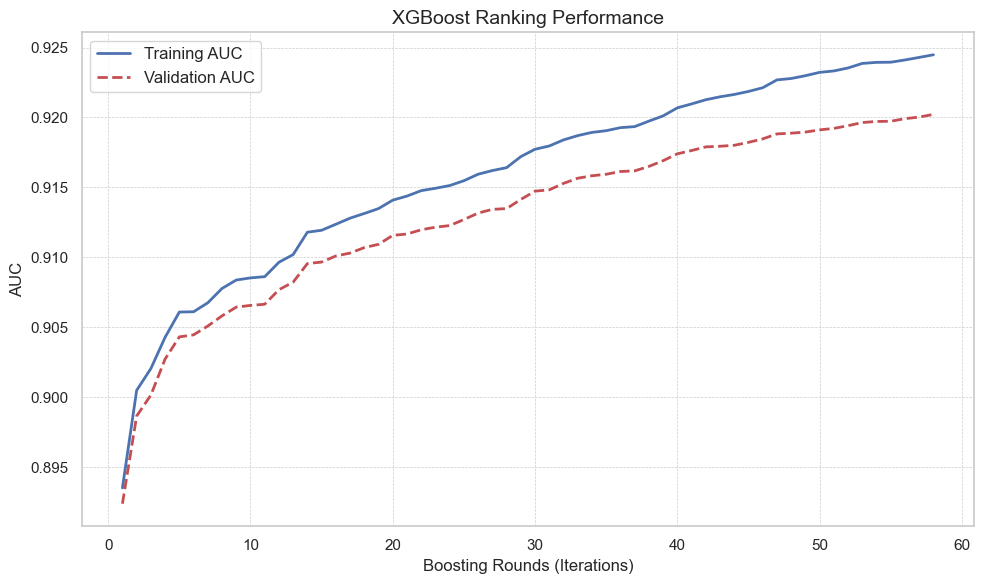

In [21]:
plot_xgb_metrics(history, 'auc', "XGBoost Ranking Performance", higher_is_better=True)

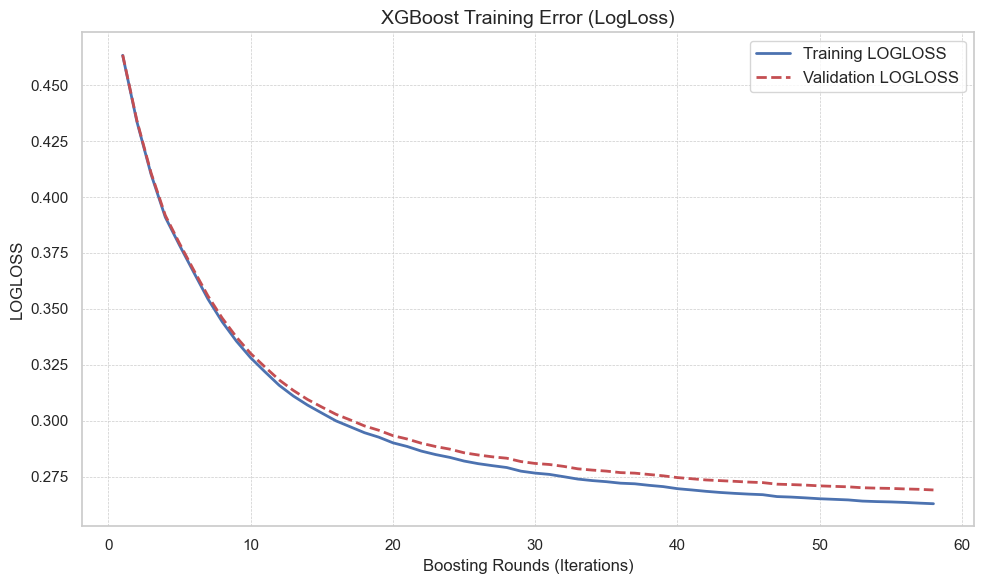

In [23]:
plot_xgb_metrics(history, 'logloss', "XGBoost Training Error (LogLoss)")